In [1]:
# RESULT: PASS. No bugs found. Corroborated with haddock_fulldata. :)
%run ../../import_src.py

import lymedata
from lymedata import *
import constants
from constants import *

import needell_ssnmf
from needell_ssnmf import Needell_SSNMF

import display_ssnmf
from display_ssnmf import *


In [2]:
data = LymeData({CHRONIC, NEURO},{SYMPTOMS},{NEURO, NON_NEURO}, defn=DEF_CNS1, drop_99=True)
print(data.df.shape)
print(data.df.columns)


data_matrix, label_matrix = data.get_data_and_labels()

ssnmf = Needell_SSNMF(data_matrix, label_matrix)
train_results, test_results, reconerr_results = ssnmf.fulldatasearch(param_range={'k': [3,6],'lambda': np.linspace(0,1,10), 'random_state': range(0,5)}
                                                          , get_topic_accu_distr=True, get_reconerr_distr=True)


Both Neuro and Mus: 2259
Only Neuro: 310
Only Mus: 762
Neither Neuro nor Mus: 632
Dropping 99
(3598, 14)
Index(['Fatigue', 'Headache', 'Joint Pain', 'Muscle aches', 'Neuropathy',
       'Twitching', 'Memory Loss', 'Cognitive Impairment', 'Sleep Impairment',
       'Psychiatric', 'Heart related', 'Gastrointestinal', 'neuro',
       'non_neuro'],
      dtype='object')


/home/reu24lyme/alex/code_lib/src/lymedata.py:74: DtypeWarning: Columns (224,249,259,269,274,294,299,304,309,339,344,365,369,373,377,395,399,403,411,415,419,423,435) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_file)


best train results:  (0.7175121612230716, {'k': 6, 'lambda': 1.0, 'random_state': 2}, 201.99650718011674, 28.609196566174678, 0.7)
best test results:  (0.7013888888888888, {'k': 6, 'lambda': 0.1111111111111111, 'random_state': 2})


In [3]:
print(train_results)
print(test_results)


{'best_train_accu': 0.7175121612230716, 'best_train_param': {'k': 6, 'lambda': 1.0, 'random_state': 2}, 'train_accu_distr':            3         6
0   0.686588  0.707783
1   0.677901  0.698749
2   0.682418  0.709521
3   0.690410  0.694232
4   0.692147  0.705698
5   0.686588  0.707783
6   0.678249  0.698749
7   0.681723  0.709868
8   0.690757  0.694232
9   0.692495  0.706046
10  0.686588  0.708826
11  0.678944  0.699097
12  0.682766  0.711605
13  0.691800  0.694580
14  0.692495  0.706741
15  0.686935  0.710215
16  0.678944  0.699444
17  0.683808  0.711258
18  0.691452  0.695274
19  0.692495  0.707088
20  0.687283  0.710215
21  0.679291  0.699792
22  0.683808  0.711258
23  0.692495  0.697012
24  0.693190  0.707783
25  0.687978  0.711605
26  0.680334  0.700139
27  0.682766  0.712995
28  0.693190  0.697012
29  0.693537  0.708478
30  0.687978  0.711258
31  0.680681  0.700139
32  0.682766  0.713343
33  0.693885  0.697707
34  0.693885  0.708478
35  0.687978  0.712300
36  0.680681  0.700834
37

best_train_accu 0.7175121612230716
best_train_param {'k': 6, 'lambda': 1.0, 'random_state': 2}


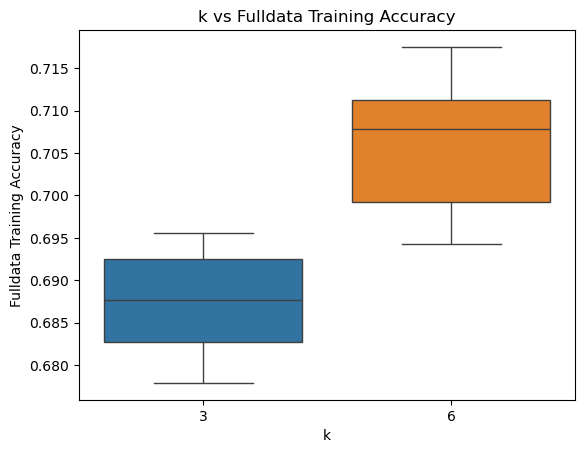

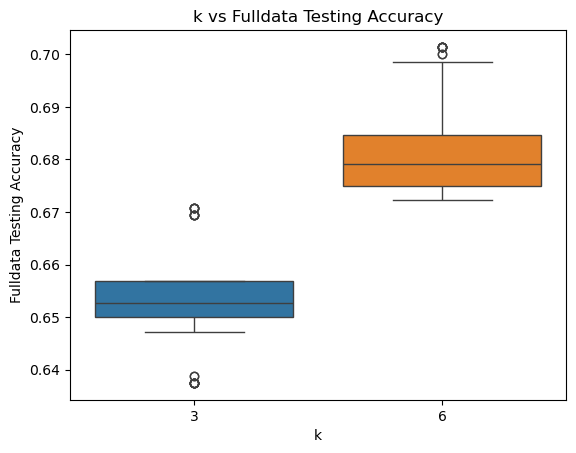

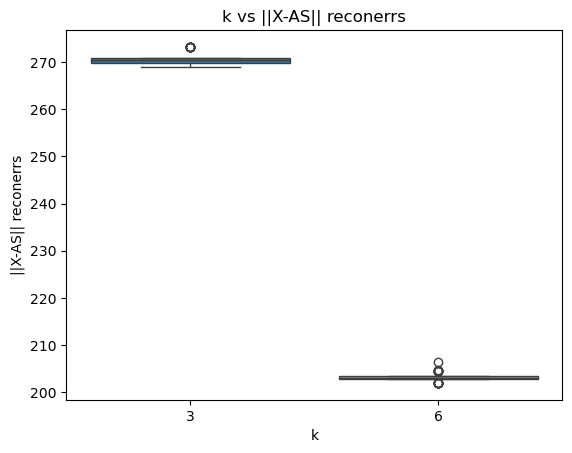

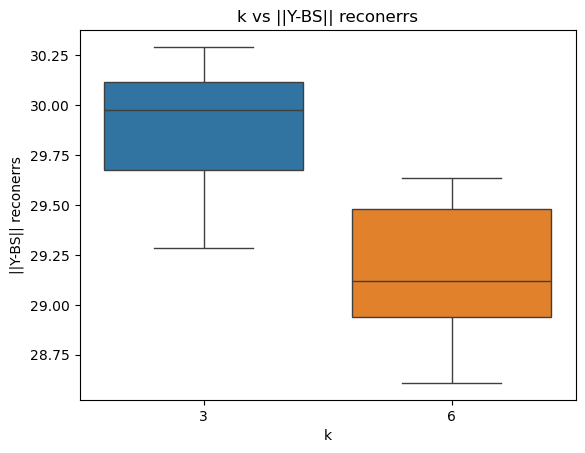

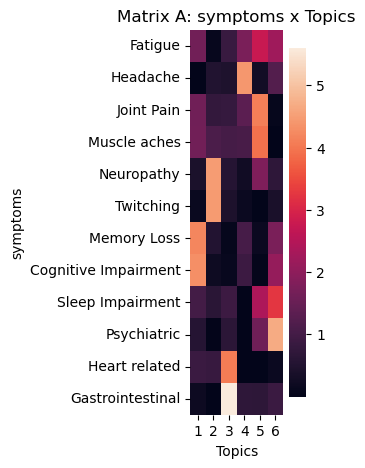

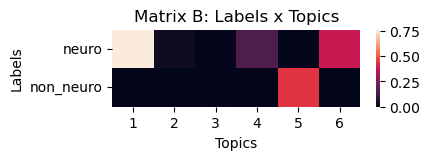

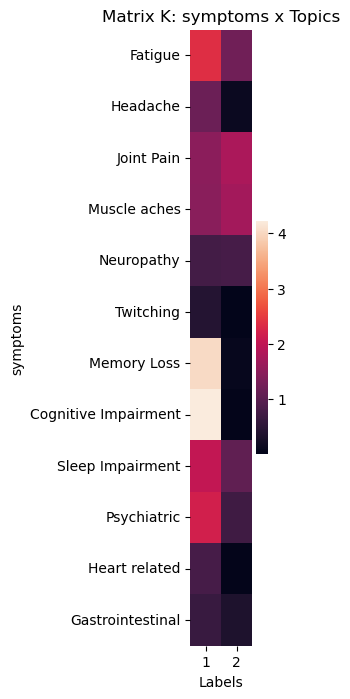

In [5]:
for k,v in train_results.items():
    if type(v) is not type(pd.DataFrame()):
        print(k,v)

# for k,v in test_results.items():
#     if type(v) is not type(pd.DataFrame()):
#         print(k,v)
        
train_accu_distr = train_results['train_accu_distr']
test_accu_distr = test_results['test_accu_distr']
Xreconerr_distr = reconerr_results['Xreconerr_distr']
Yreconerr_distr = reconerr_results['Yreconerr_distr']


display_distr(train_accu_distr, ylabel='Fulldata Training Accuracy')
display_distr(test_accu_distr, ylabel='Fulldata Testing Accuracy')

display_distr(Xreconerr_distr, ylabel='||X-AS|| reconerrs')
display_distr(Yreconerr_distr, ylabel='||Y-BS|| reconerrs')

names = SYMPTOMS
labels = [x for x in data.df.columns if x not in [NEURO, NON_NEURO]]
best_model = ssnmf.fulldata_best_train_model

display_ssnmf(model=best_model, feature_name=names, feature_labels=labels, class_labels=data.labels)
